# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [69]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [130]:
# Your code here
def alpha_func(D,idx):
# use Sepal's width and length
    sepal_width = D.iloc[idx]['Sepal.Width']
    sepal_length = D.iloc[idx]['Sepal.Length']
    alpha = (sepal_width * sepal_length).mean()
    return alpha

Test the code below

In [104]:
print(alpha_func(df, range(100)))

16.892


_(ii)_ Construct a new bootstrap data set and recompute alpha

In [103]:
rng = np.random.default_rng(100)
bootstrap_alpha = alpha_func(df, rng.choice(len(df), len(df), replace=True))
print("Alpha recomputed with new bootstrap data set:", bootstrap_alpha)

Alpha recomputed with new bootstrap data set: 17.74086666666667


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

If we calculate the mean of the relevant variable Sepal.Length we will just get the average value of this data. Bootstrapping will tell us how much the average can change if we took different data samples. It is a great tool to help us understand the uncertainity and create confidence intervals. Bootstrapping will help us understand how reliable our calculation is.

In [78]:
# Add your code here to set the seed
rng = np.random.default_rng(100)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [125]:
# Your code here
def mean_sepal_length(D, idx):
    sepal_length = D.iloc[idx]['Sepal.Length']
    return sepal_length.mean()

def boot_SE(data, func, B=1000):
    bootstrap_samples = np.array([func(data, rng.choice(len(data), len(data), replace=True)) for _ in range(B)])
    return np.std(bootstrap_samples), bootstrap_samples

alpha_std_error, bootstrap_example = boot_SE(df, alpha_func, B=1000)
print("Bootstrap standard error of alpha with B=1000:", alpha_std_error)

Bootstrap standard error of alpha with B=1000: 0.28801010954786516


Original mean value of Sepal.Length is 5.843

_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [127]:
# Add your code here

t_range = np.ptp(bootstrap_example)
print("Range of bootstrapped example:", t_range)

boot_mean = np.mean(bootstrap_example)
boot_stddev = np.std(bootstrap_example)
original_meanvalue_sepal_length = df['Sepal.Length'].mean()

print("Bootstrapped mean value:", boot_mean)
print("Bootstrapped std dev:", boot_stddev)
print("Original mean:", original_meanvalue_sepal_length)
print("Difference between bootstrapped mean and original mean is:", boot_mean - original_meanvalue_sepal_length)

Range of bootstrapped example: 1.924000000000003
Bootstrapped mean value: 17.823536733333334
Bootstrapped std dev: 0.28801010954786516
Original mean: 5.843333333333334
Difference between bootstrapped mean and original mean is: 11.9802034


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [118]:
# Add your code here

confidence_interval = np.percentile(bootstrap_example, [2.5, 97.5])
print("95% confidence interval for the mean value of iris petal length:", confidence_interval)

95% confidence interval for the mean value of iris petal length: [17.30066167 18.37399667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

The histogram shows that being a bell shaped curve the Sepal Length values of the bootstrapped data distribution is normal. The Sepal Length values vary from 17.25 to 18.5 which is the range of the mean of the bootstrapped. Also, 17.75 seems to be the most frequent value and hence it is the peak of the histogram.

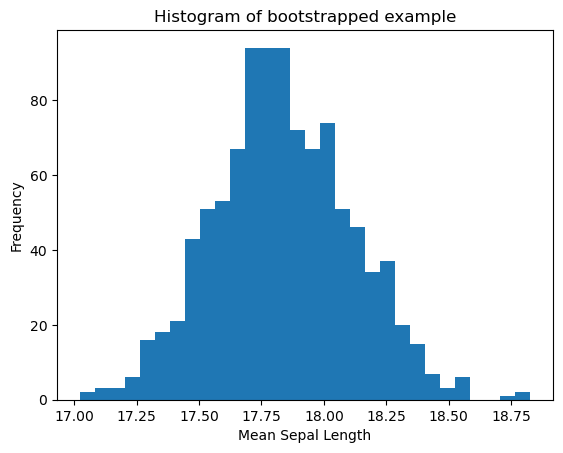

In [119]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(bootstrap_example, bins=30)

# Add a title
#Add your code here
ax.set_title('Histogram of bootstrapped example')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Mean Sepal Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

# Write your answer here

Basis my bootstrap analysis, I would recommend a couple of things to the company.

The shipping company should plan for an average Sepal Length of 17.75 units going up to 18.5 units. By doing this the company can optimize their space allocation and usage.

The 95% confidence interval for the mean Sepal Length is approximately [17.3,18.37]. This is the range in which the average Sepal Length will be in most of the time. The company should consider this range when planning space allocation and usage.


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
